In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the insurance data
file_path ='../Data/MachineLearningRating_v3.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
# Data Understanding
print(data.head())
print(data.info())

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

Data Summarization


In [4]:
# Get descriptive statistics for numerical features
print(data.describe())

       UnderwrittenCoverID      PolicyID    PostalCode        mmcode  \
count         1.000098e+06  1.000098e+06  1.000098e+06  9.995460e+05   
mean          1.048175e+05  7.956682e+03  3.020601e+03  5.487770e+07   
std           6.329371e+04  5.290039e+03  2.649854e+03  1.360381e+07   
min           1.000000e+00  1.400000e+01  1.000000e+00  4.041200e+06   
25%           5.514300e+04  4.500000e+03  8.270000e+02  6.005692e+07   
50%           9.408300e+04  7.071000e+03  2.000000e+03  6.005842e+07   
75%           1.391900e+05  1.107700e+04  4.180000e+03  6.005842e+07   
max           3.011750e+05  2.324600e+04  9.870000e+03  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count      1.000098e+06  999546.000000  999546.000000  999546.000000   
mean       2.010225e+03       4.046642    2466.743258      97.207919   
std        3.261391e+00       0.294020     442.800640      19.393256   
min        1.987000e+03       0.000000       0.000000       0.0

In [6]:
# Calculate variability metrics for selected numerical features
variability_metrics = data[['TotalPremium', 'TotalClaims', 'cubiccapacity']].agg(['mean', 'std', 'min', 'max', 'quantile'])
print(variability_metrics)

          TotalPremium    TotalClaims  cubiccapacity
mean         61.905496      64.861190    2466.743258
std         230.284513    2384.074695     442.800640
min        -782.576754  -12002.412281       0.000000
max       65282.603421  393092.105263   12880.000000
quantile      2.178333       0.000000    2694.000000


In [7]:
# Categorical data analysis: Value counts for IsVATRegistered
print(data['IsVATRegistered'].value_counts())

IsVATRegistered
False    995075
True       5023
Name: count, dtype: int64


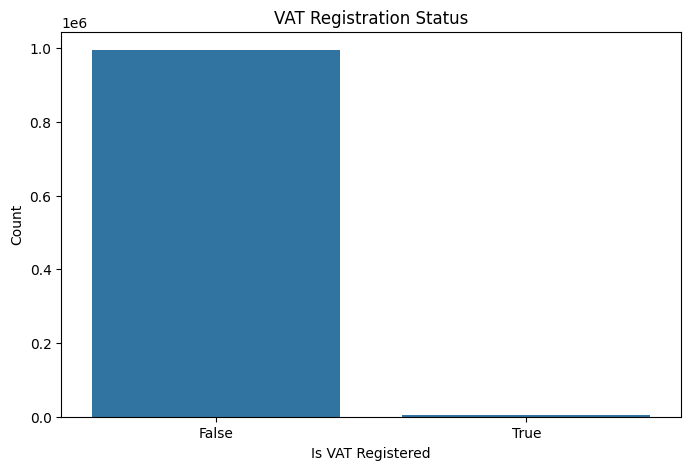

In [9]:
# Visualization: Count plot for IsVATRegistered
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='IsVATRegistered')
plt.title('VAT Registration Status')
plt.xlabel('Is VAT Registered')
plt.ylabel('Count')
plt.show()

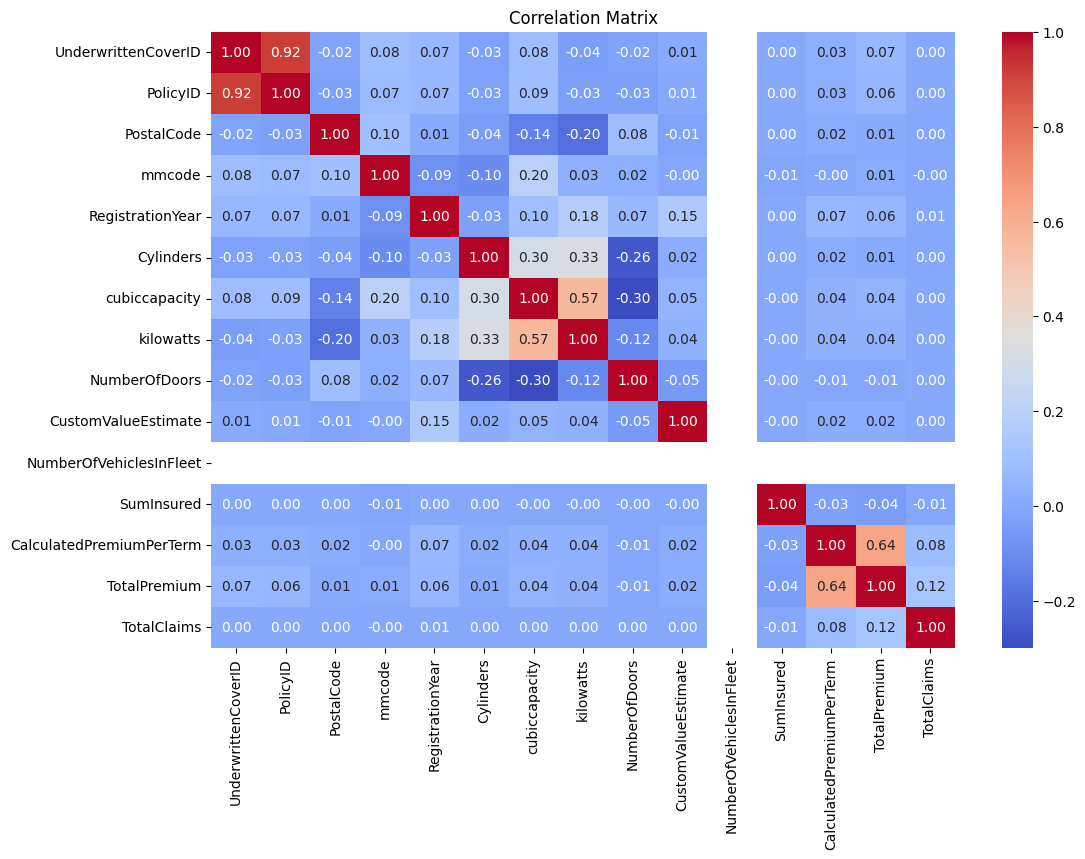

In [11]:

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:

# Grouped analysis: Average TotalPremium by Gender
average_premium_by_gender = data.groupby('Gender')['TotalPremium'].mean()
print(average_premium_by_gender)

Gender
Female           45.074841
Male             36.904566
Not specified    62.915389
Name: TotalPremium, dtype: float64


In [13]:
# Time series analysis: Monthly Total Premiums
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
monthly_data = data.resample('M', on='TransactionMonth').sum()
monthly_data['TotalPremium'].plot(title='Monthly Total Premiums')
plt.xlabel('Date')
plt.ylabel('Total Premium')
plt.show()

C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_8460\2058479790.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M', on='TransactionMonth').sum()


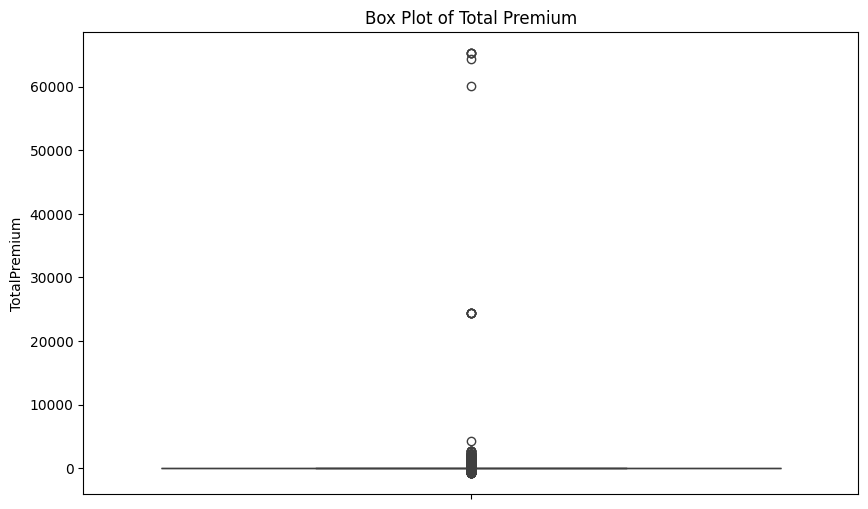

In [3]:
# Outlier detection: Box plot for TotalPremium
plt.figure(figsize=(10, 6))
sns.boxplot(data=data['TotalPremium'])
plt.title('Box Plot of Total Premium')
plt.show()

In [4]:
print("\nData Types of Each Column:")
print(data.dtypes)


Data Types of Each Column:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object


In [5]:
# Check for categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
print("\nCategorical Variables:")
print(categorical_columns)


Categorical Variables:
Index(['TransactionMonth', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'VehicleType', 'make',
       'Model', 'bodytype', 'VehicleIntroDate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'TermFrequency',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType'],
      dtype='object')


In [6]:
# Check for datetime variables
datetime_columns = data.select_dtypes(include=['datetime']).columns
print("\nDatetime Variables:")
print(datetime_columns)


Datetime Variables:
Index([], dtype='object')


In [7]:
# Check for numeric variables
numeric_columns = data.select_dtypes(include=['number']).columns
print("\nNumeric Variables:")
print(numeric_columns)


Numeric Variables:
Index(['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode',
       'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts',
       'NumberOfDoors', 'CustomValueEstimate', 'NumberOfVehiclesInFleet',
       'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [8]:
# convert columns to appropriate types if needed
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [9]:
#Convert a column to category
data['IsVATRegistered'] = data['IsVATRegistered'].astype('category')

In [10]:

# Display the updated data types after conversion
print("\nUpdated Data Types:")
print(data.dtypes)


Updated Data Types:
UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                   category
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                            

Data quality assessment

In [11]:

# Check for missing values
missing_values = data.isnull().sum()

# Filter to show only columns with missing values
missing_values = missing_values[missing_values > 0]

# Display the count of missing values for each column
print("\nMissing Values Count:")
print(missing_values)

# Optionally, check the percentage of missing values
missing_percentage = (missing_values / len(data)) * 100
print("\nPercentage of Missing Values:")
print(missing_percentage)


Missing Values Count:
Bank                        145961
AccountType                  40232
MaritalStatus                 8259
Gender                        9536
mmcode                         552
VehicleType                    552
make                           552
Model                          552
Cylinders                      552
cubiccapacity                  552
kilowatts                      552
bodytype                       552
NumberOfDoors                  552
VehicleIntroDate               552
CustomValueEstimate         779642
CapitalOutstanding               2
NewVehicle                  153295
WrittenOff                  641901
Rebuilt                     641901
Converted                   641901
CrossBorder                 999400
NumberOfVehiclesInFleet    1000098
dtype: int64

Percentage of Missing Values:
Bank                        14.594670
AccountType                  4.022806
MaritalStatus                0.825819
Gender                       0.953507
mmcode     

In [12]:

# Set the style for seaborn
sns.set(style='whitegrid')

# Plot histograms for numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns


In [18]:
# Determine the number of plots
num_plots = len(numerical_cols)
cols = 3  # Number of columns in the subplot
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

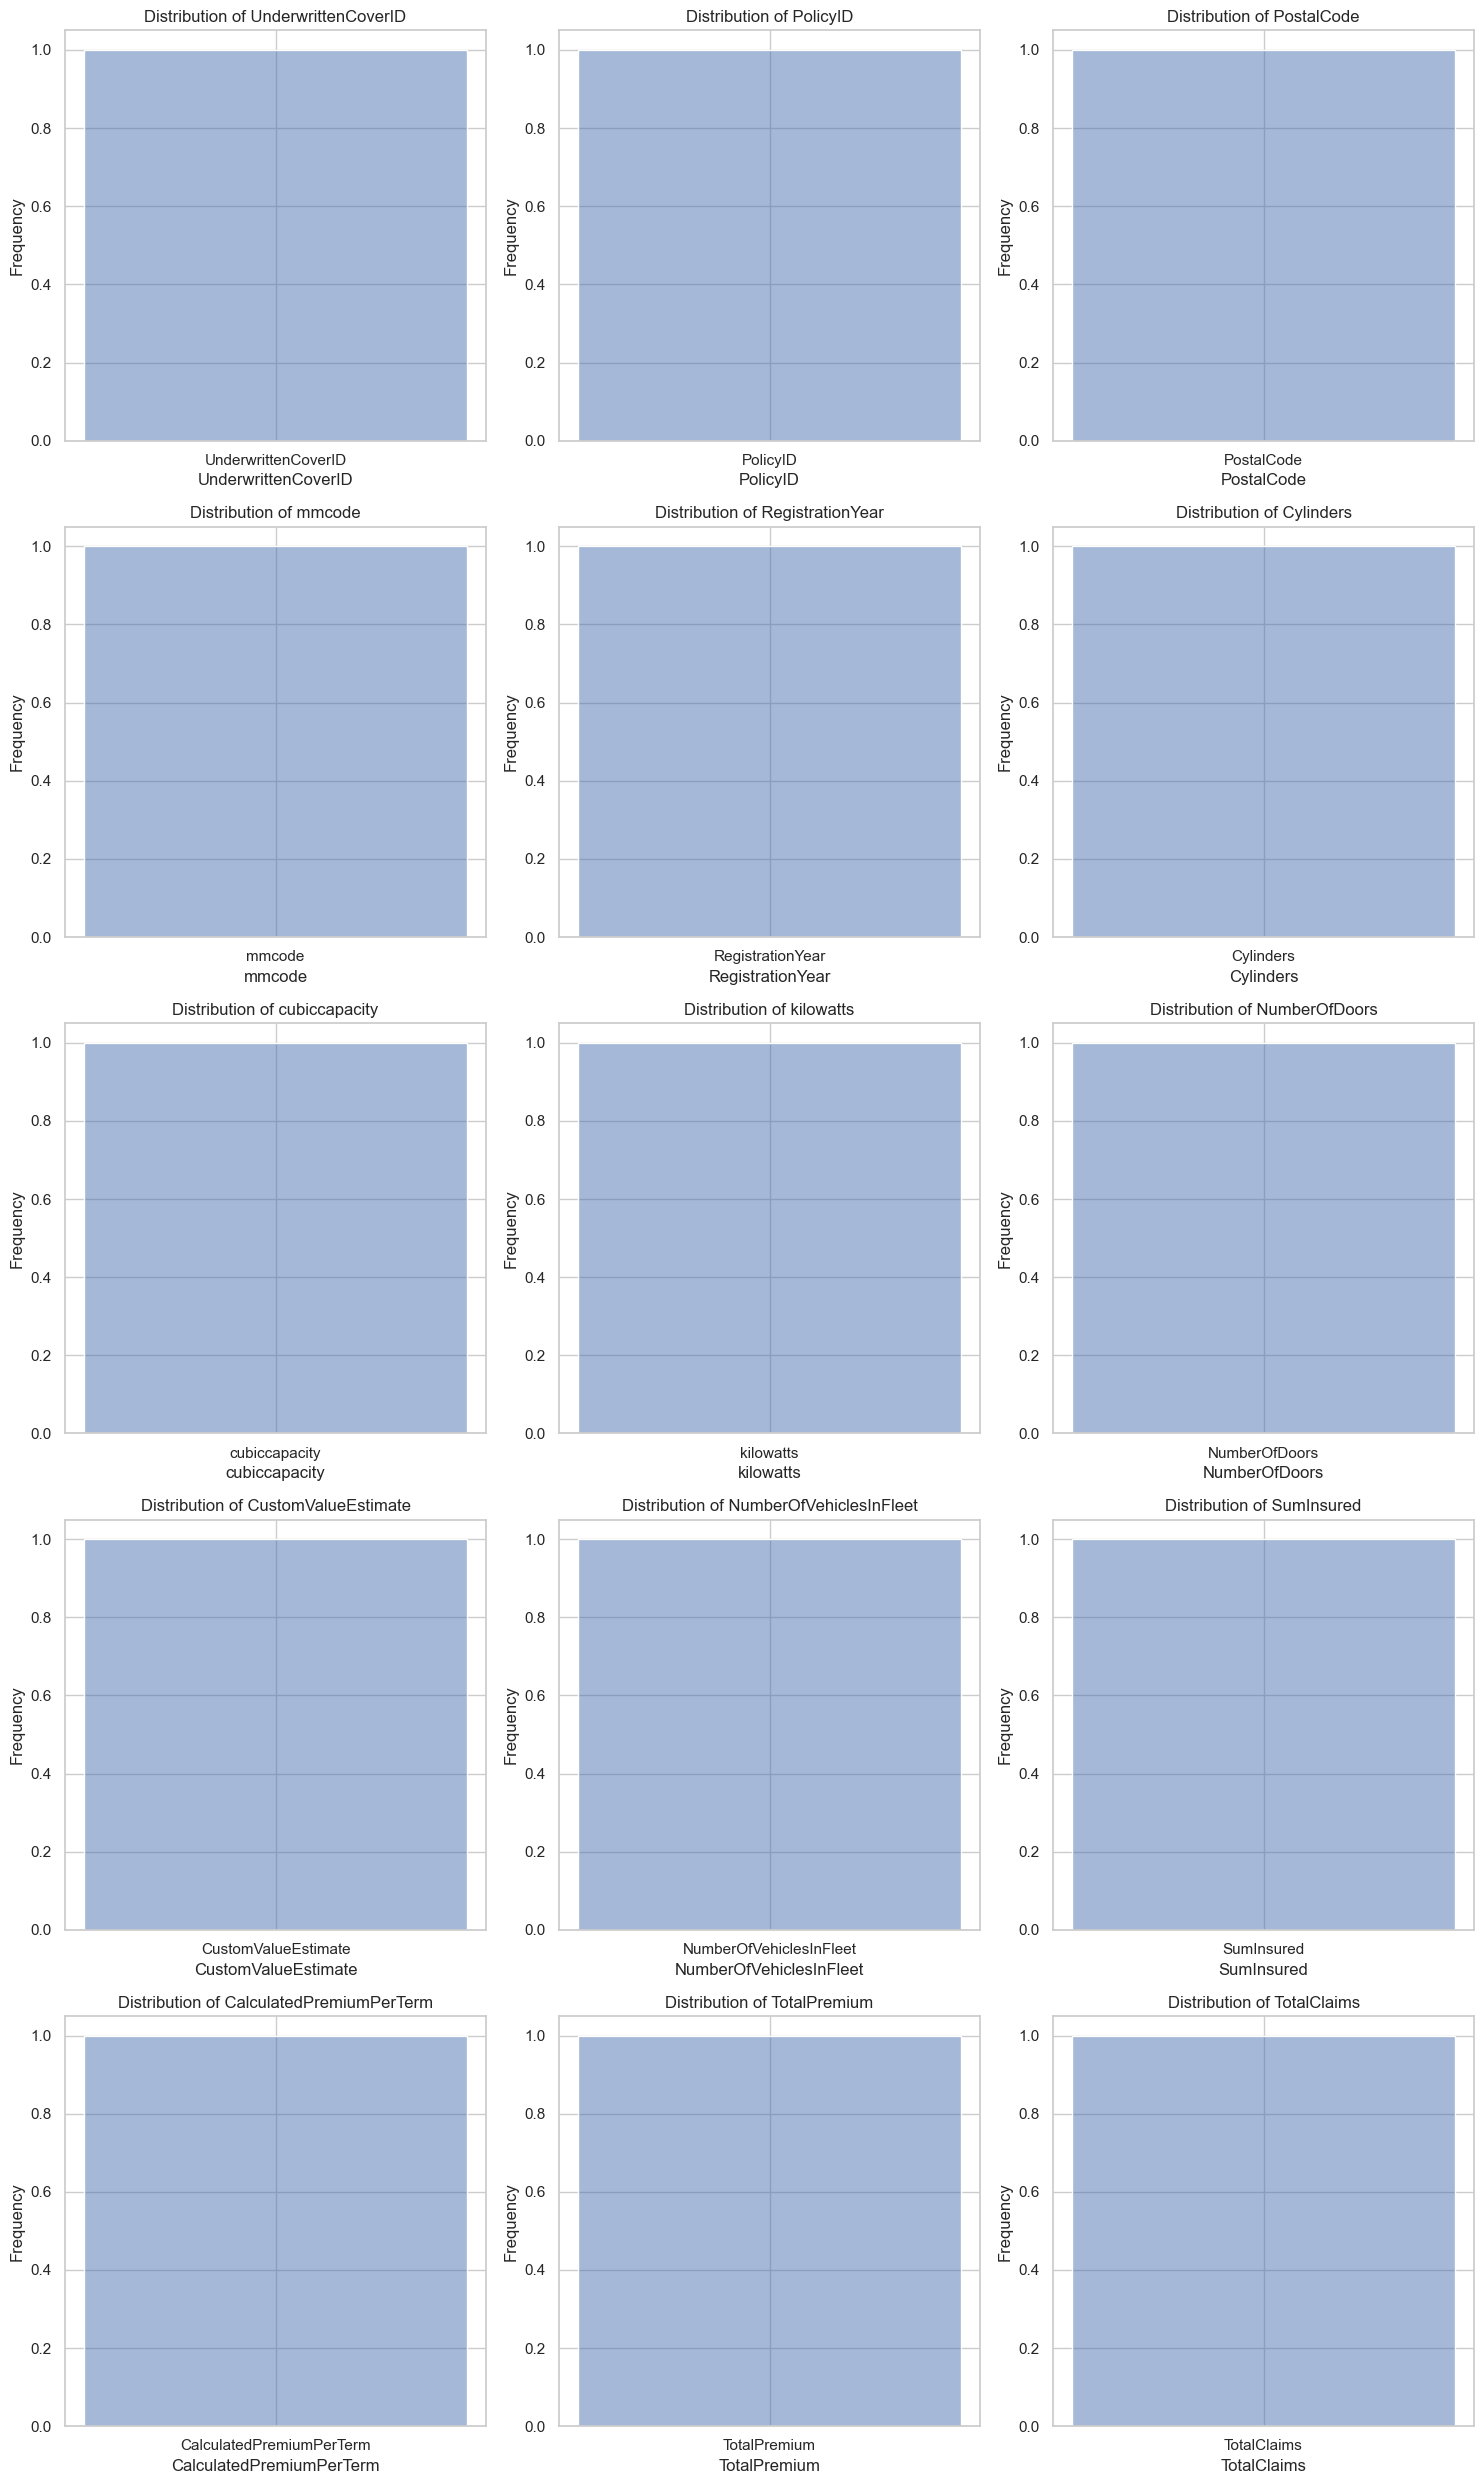

In [19]:
plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on the number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)  # Create subplots dynamically
    sns.histplot(data=[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [21]:

# Plot bar charts for categorical columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns


In [17]:
# Alternatively, you can use:
num_columns = len(data.columns)

# Display the number of columns
print(f'Number of columns in the DataFrame: {num_columns}')

Number of columns in the DataFrame: 52


In [23]:
# Determine the number of plots
num_plots = len(categorical_cols)
cols = 3  # Number of columns in the subplot
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

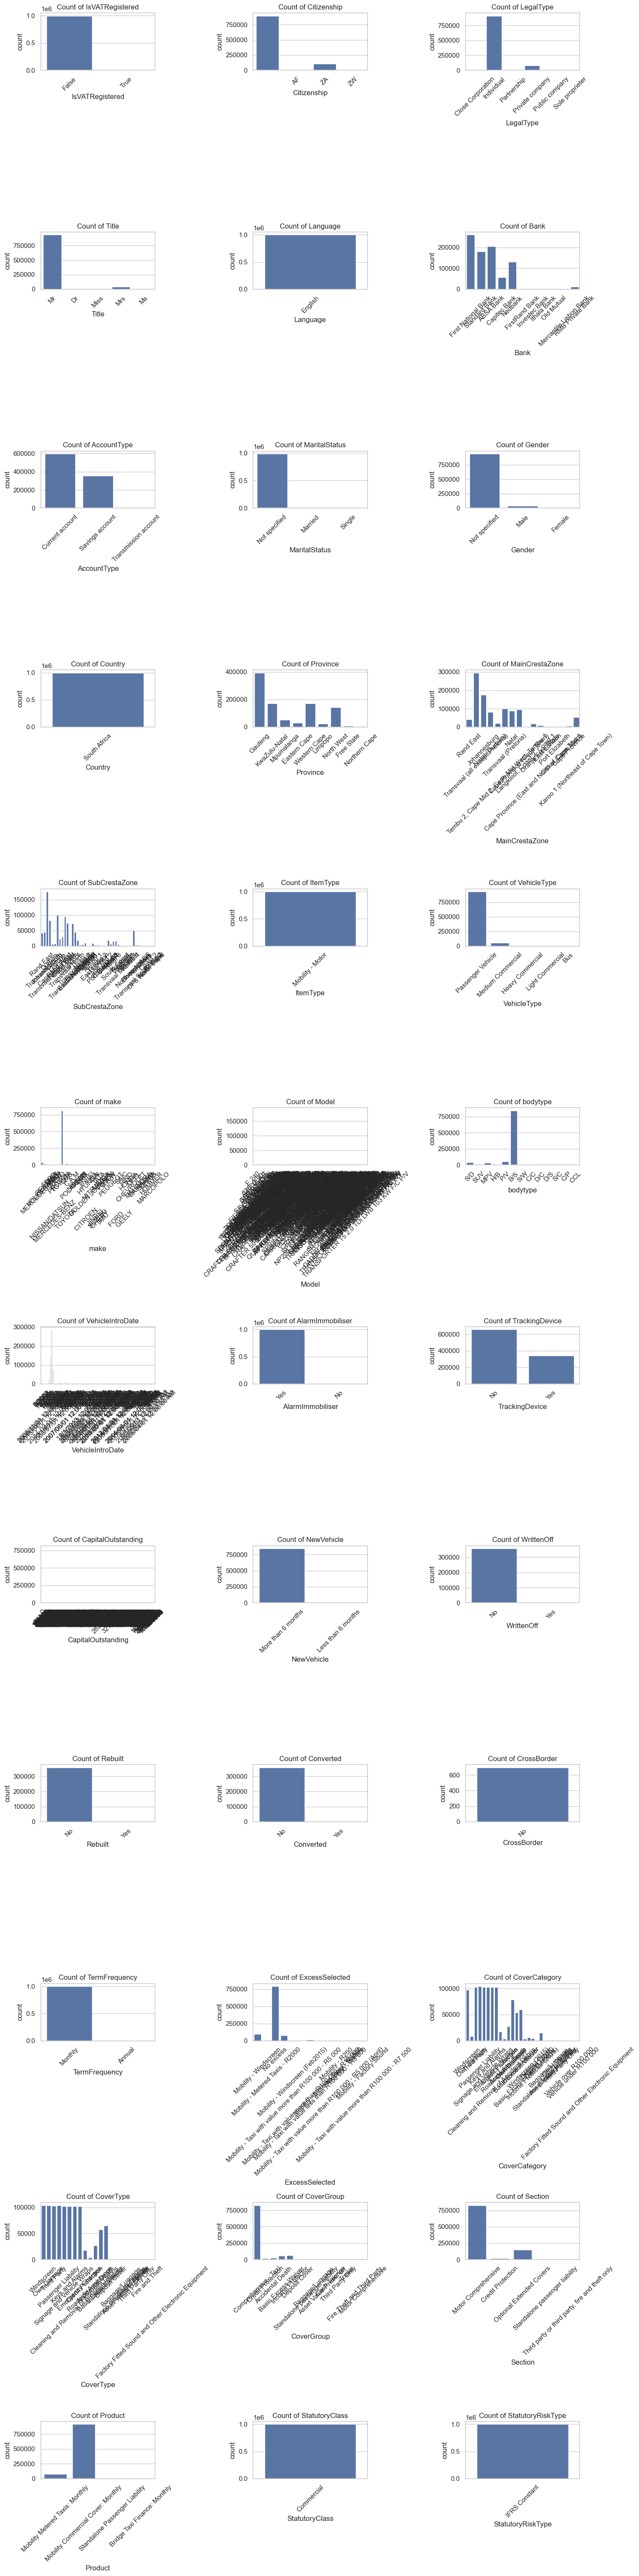

In [25]:
plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on the number of rows
for i, col in enumerate(categorical_cols):
    plt.subplot(rows, cols, i + 1)  # Create subplots dynamically
    sns.countplot(data=data, x=col)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

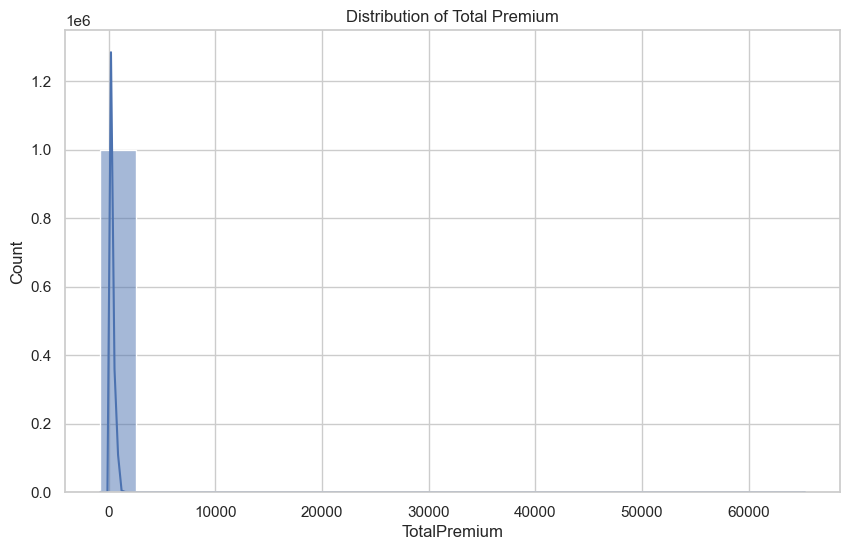

In [26]:
# Plot histograms for numerical columns
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalPremium'], bins=20, kde=True)
plt.title('Distribution of Total Premium')
plt.show()

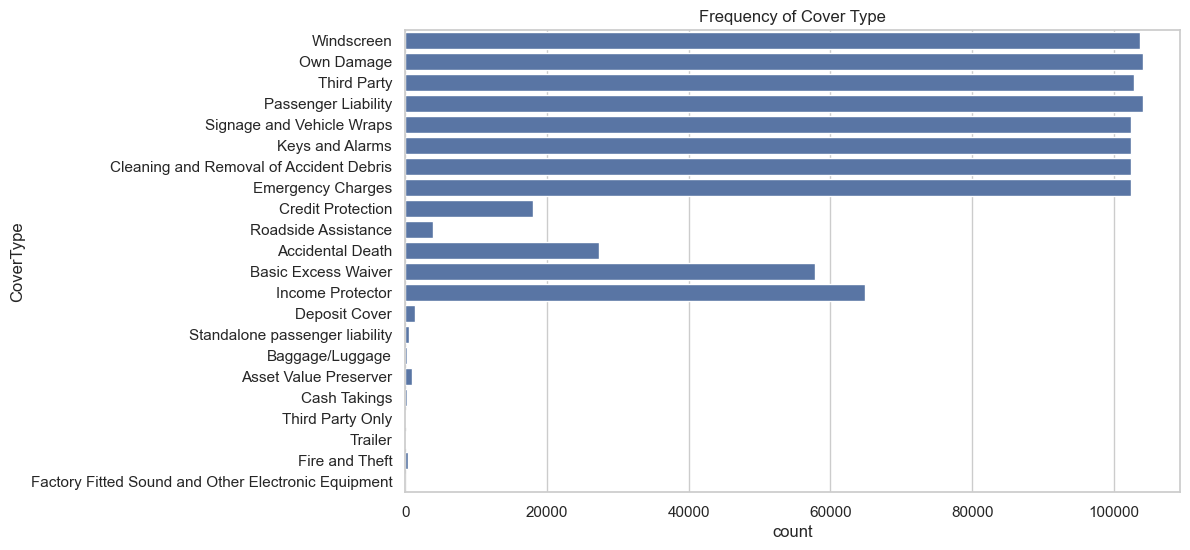

In [27]:
 # Create bar charts for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(data['CoverType'])
plt.title('Frequency of Cover Type')
plt.show()

Bivariate or Multivariate Analysis

In [28]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])

In [31]:

# Calculate monthly changes for TotalPremium and TotalClaims
data.sort_values(by=['PostalCode', 'TransactionMonth'], inplace=True)
data['MonthlyChangePremium'] = data.groupby('PostalCode')['TotalPremium'].diff()
data['MonthlyChangeClaims'] = data.groupby('PostalCode')['TotalClaims'].diff()

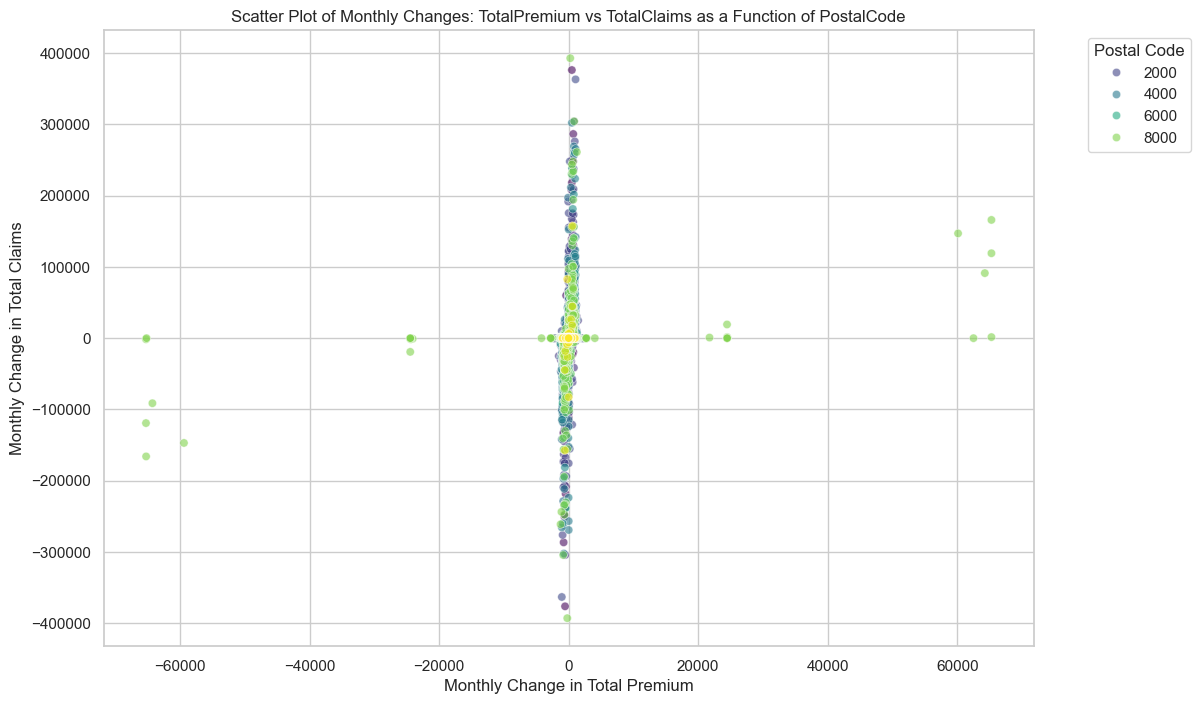

In [32]:
# Drop rows with NaN values that result from the diff() operation
data.dropna(subset=['MonthlyChangePremium', 'MonthlyChangeClaims'], inplace=True)

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='MonthlyChangePremium', y='MonthlyChangeClaims', 
                hue='PostalCode', palette='viridis', alpha=0.6)
plt.title('Scatter Plot of Monthly Changes: TotalPremium vs TotalClaims as a Function of PostalCode')
plt.xlabel('Monthly Change in Total Premium')
plt.ylabel('Monthly Change in Total Claims')
plt.legend(title='Postal Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

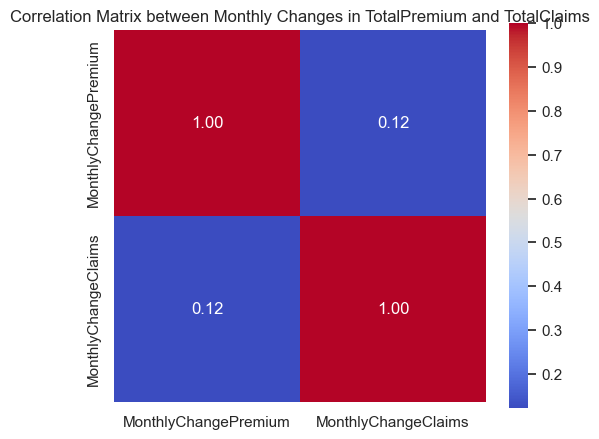

In [33]:

# Calculate correlation matrix for monthly changes
correlation_matrix = data[['MonthlyChangePremium', 'MonthlyChangeClaims']].corr()

# Plot the correlation matrix
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix between Monthly Changes in TotalPremium and TotalClaims')
plt.show()

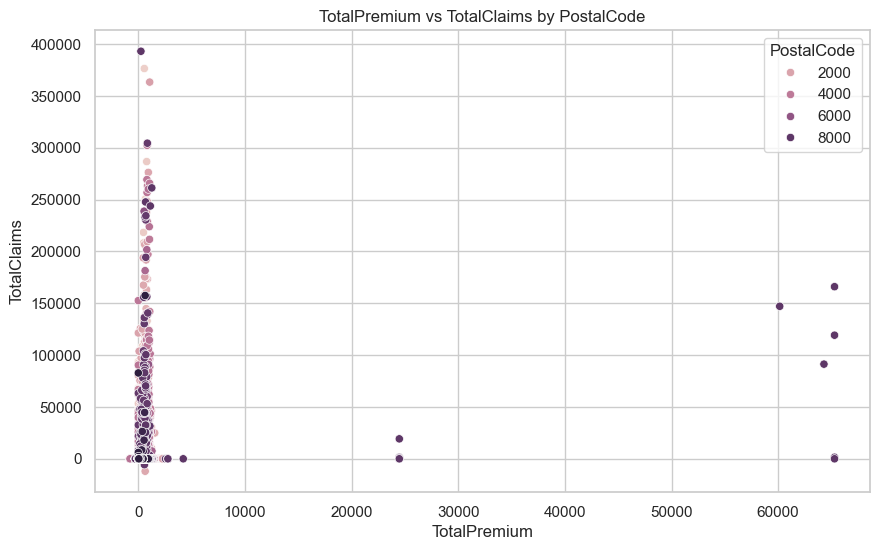

In [34]:
 # Scatter plot for TotalPremium vs TotalClaims based on mmcode
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='PostalCode', data=data)
plt.title('TotalPremium vs TotalClaims by PostalCode')
plt.show()

Data Compression

In [35]:
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

In [37]:
# Display unique values for insurance cover type and auto make
print("Unique Insurance Cover Types:")
print(data['CoverType'].unique())

print("\nUnique Auto Makes:")
print(data['make'].unique())

Unique Insurance Cover Types:
['Income Protector' 'Cleaning and Removal of Accident Debris'
 'Emergency Charges' 'Roadside Assistance' 'Windscreen'
 'Signage and Vehicle Wraps' 'Third Party' 'Passenger Liability'
 'Own Damage' 'Keys and Alarms' 'Basic Excess Waiver' 'Credit Protection'
 'Baggage/Luggage' 'Accidental Death' 'Asset Value Preserver'
 'Standalone passenger liability' 'Fire and Theft' 'Deposit Cover'
 'Third Party Only' 'Cash Takings'
 'Factory Fitted Sound and Other Electronic Equipment' 'Trailer']

Unique Auto Makes:
['TOYOTA' 'C.A.M' 'JINBEI' 'VOLKSWAGEN' 'MERCEDES-BENZ' 'GOLDEN JOURNEY'
 'CMC' 'AUDI' 'FIAT' 'NISSAN/DATSUN                      '
 'JMC                                '
 'MERCEDES-BENZ                      ' 'HYUNDAI'
 'CITROEN                            ' 'FOTON' 'NISSAN'
 'TOYOTA                             ' 'SAIC' 'IVECO'
 'CHERY                              ' 'B.A.W' 'VOLVO' 'MAZDA' 'TATA'
 'CHEVROLET' 'HONDA' 'BMW' 'FORD' 'POLARSUN' 'RENAULT' 'DAIHATS

In [40]:
# Aggregate data by PostalCode for relevant factors
aggregated_data = data.groupby('PostalCode').agg({
    'TotalPremium': 'mean',
    'CoverType': lambda x: x.mode()[0],  # Most common cover type
    'make': lambda x: x.mode()[0]  # Most common auto make
}).reset_index()

# Display the aggregated data
print("\nAggregated Data:")
print(aggregated_data.head())


Aggregated Data:
   PostalCode  TotalPremium                                CoverType    make
0           1     51.130049  Cleaning and Removal of Accident Debris  TOYOTA
1           2     40.929206  Cleaning and Removal of Accident Debris  TOYOTA
2           4    115.335751                         Accidental Death  TOYOTA
3           5     61.799262                         Accidental Death  TOYOTA
4           6     50.706674                      Basic Excess Waiver  TOYOTA


C:\Users\Tesfaye\AppData\Local\Temp\ipykernel_2936\1438047076.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aggregated_data, x='PostalCode', y='TotalPremium', palette='viridis')


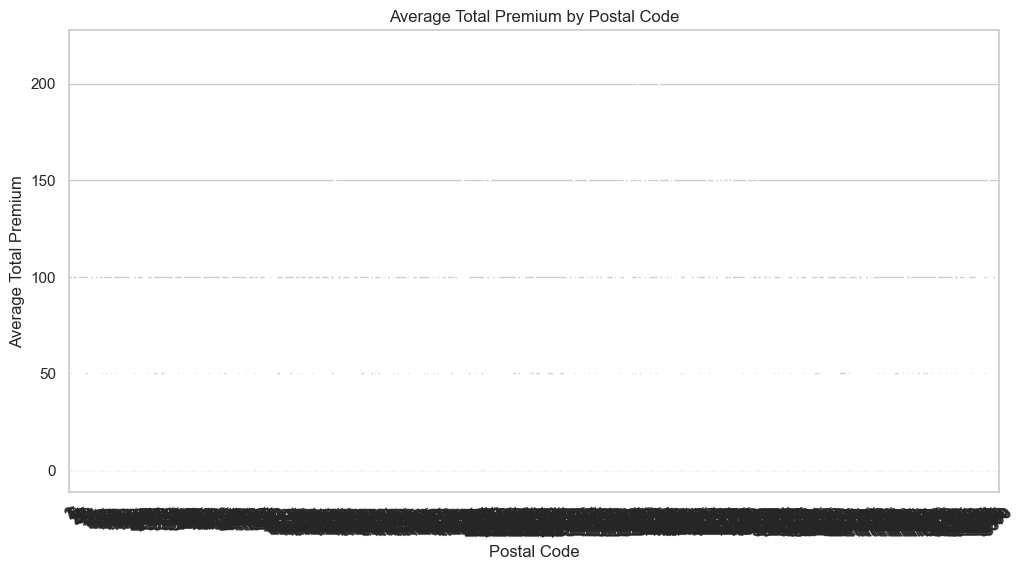

In [41]:

# Bar plot for average premium by PostalCode
plt.figure(figsize=(12, 6))
sns.barplot(data=aggregated_data, x='PostalCode', y='TotalPremium', palette='viridis')
plt.title('Average Total Premium by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Average Total Premium')
plt.xticks(rotation=45)
plt.show()

C:\Users\Tesfaye\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


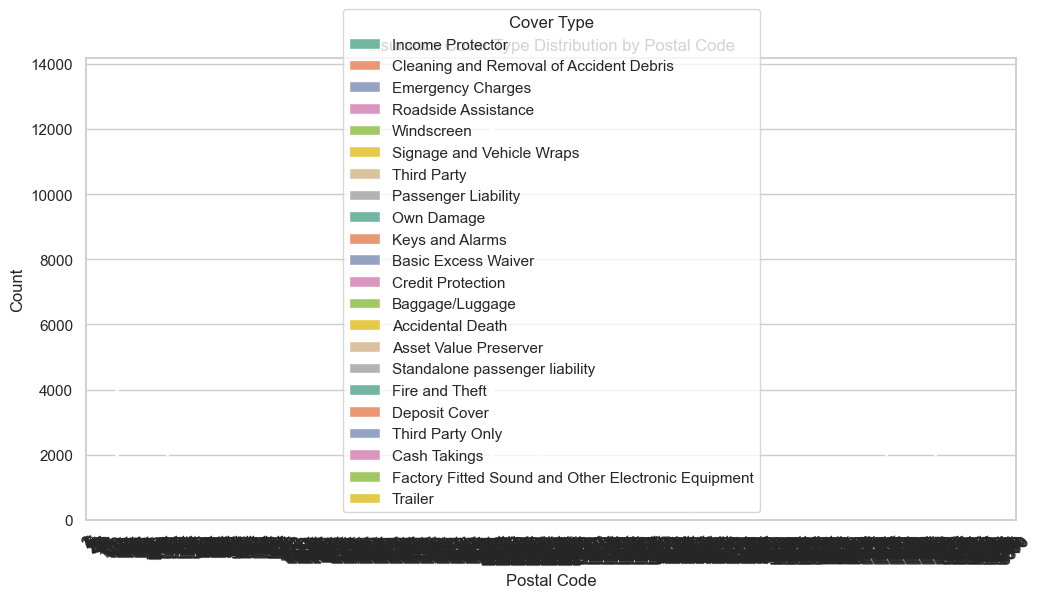

In [42]:

# Plot most common cover type by PostalCode
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PostalCode', hue='CoverType', palette='Set2')
plt.title('Insurance Cover Type Distribution by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cover Type')
plt.show()

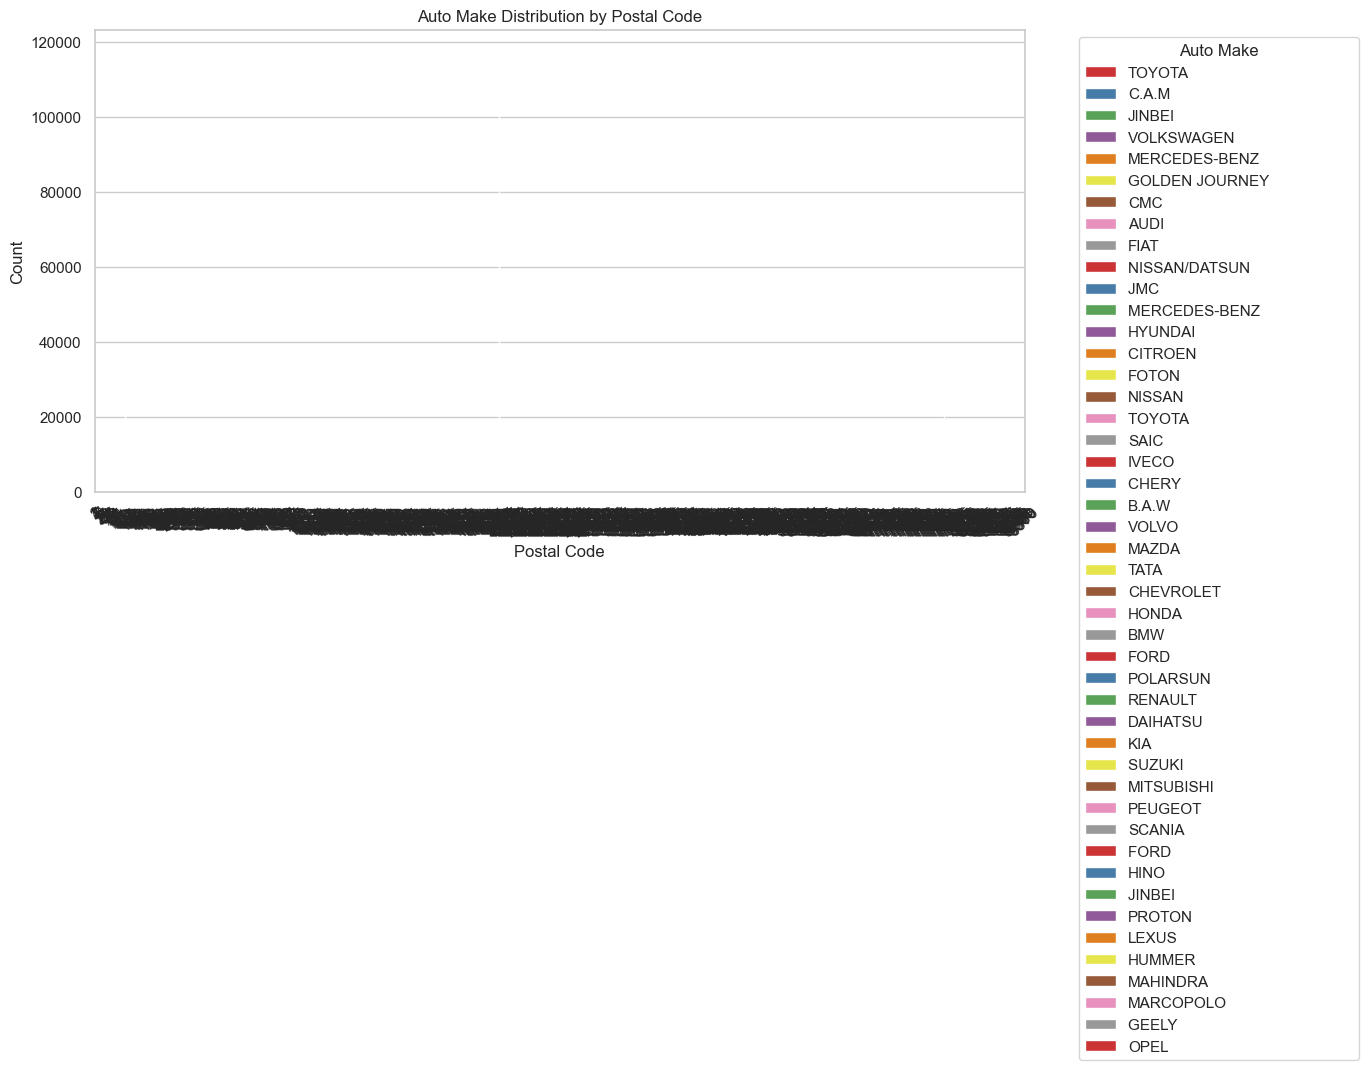

In [44]:

# Plot most common auto make by PostalCode
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='PostalCode', hue='make', palette='Set1')
plt.title('Auto Make Distribution by Postal Code')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Auto Make', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Outlier Detection

In [45]:
# Clean column names by stripping whitespace
data.columns = data.columns.str.strip()

# Select numerical columns
numerical_cols = data.select_dtypes(include=['number']).columns

In [46]:
# Determine the number of plots
num_plots = len(numerical_cols)
cols = 3  # Number of columns in the subplot
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

ValueError: List of boxplot statistics and `positions` values must have same the length

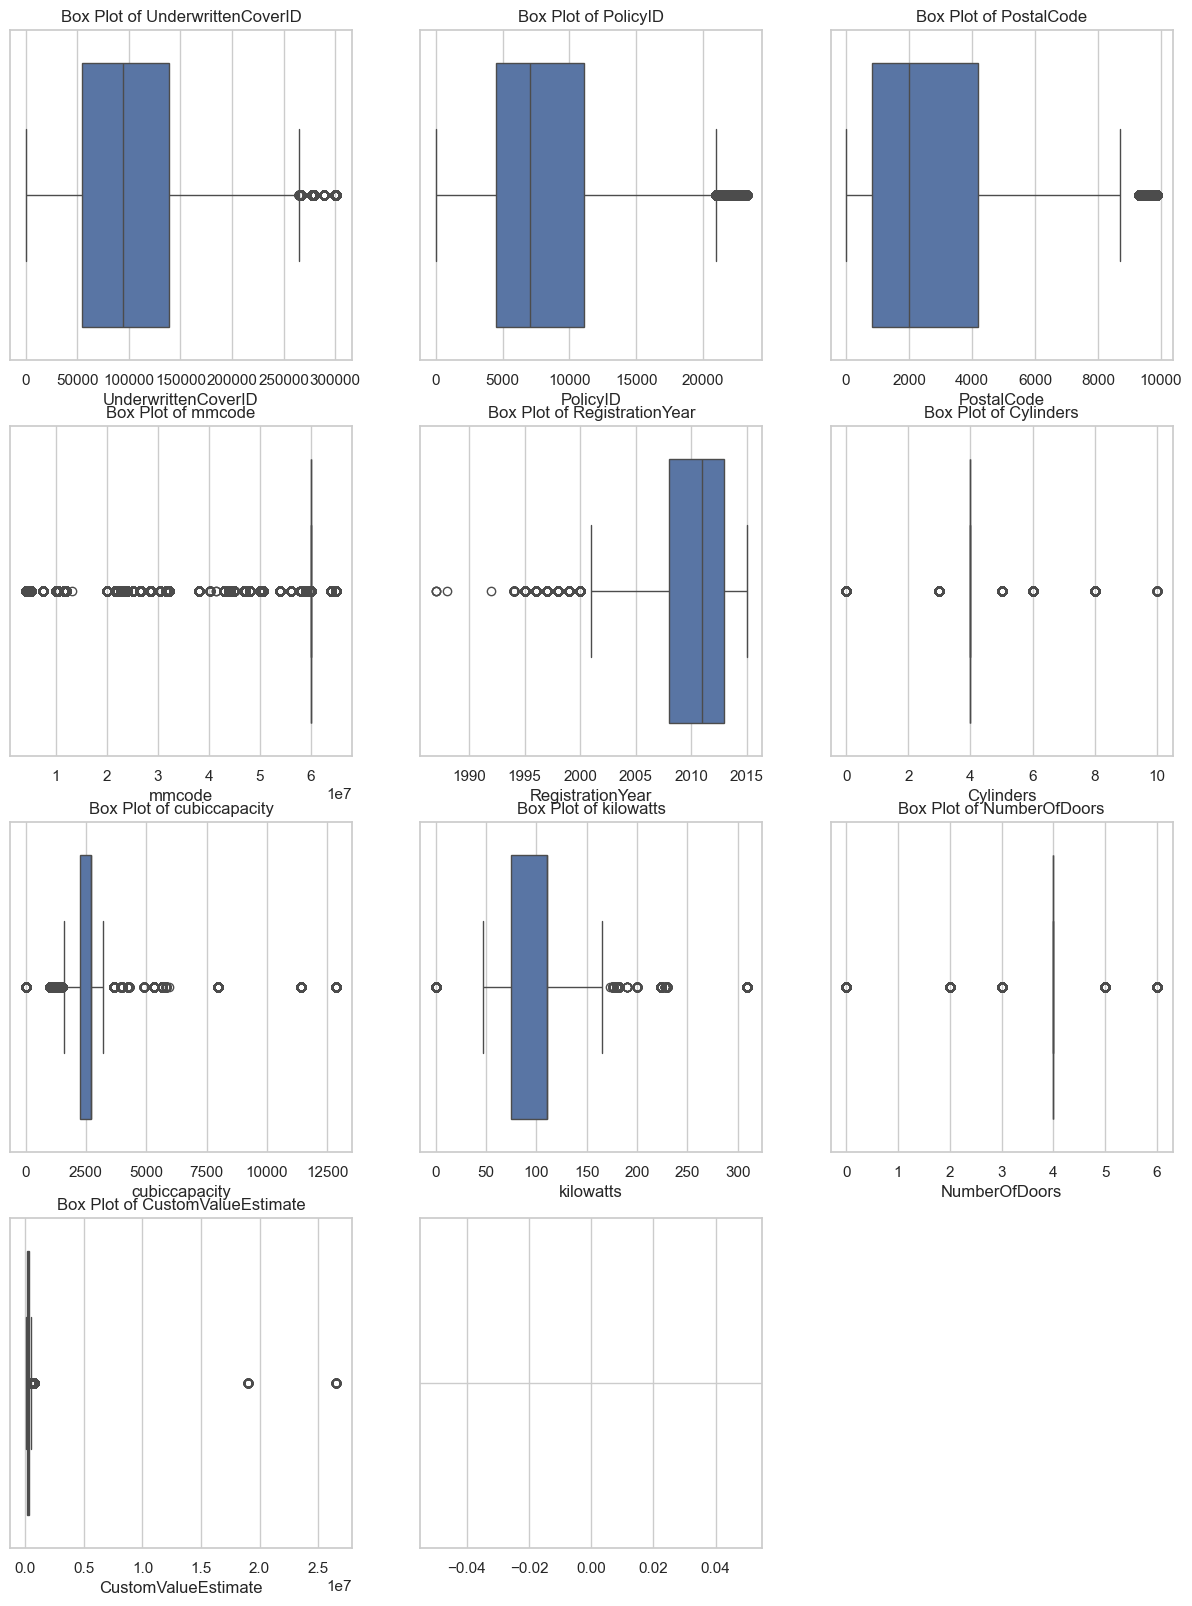

In [73]:

# Load the insurance data
file_path ='../Data/MachineLearningRating_v3.txt'
data = pd.read_csv(file_path, sep='|', low_memory=False) 

# Determine the number of plots
num_plots = len(numerical_cols)
cols = 3  # Number of columns in the subplot
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

# Create box plots for numerical columns
plt.figure(figsize=(15, 5 * rows))  # Adjust figure height based on the number of rows
for i, col in enumerate(numerical_cols):
    plt.subplot(rows, cols, i + 1)  # Create subplots dynamically
    sns.boxplot(data=data, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

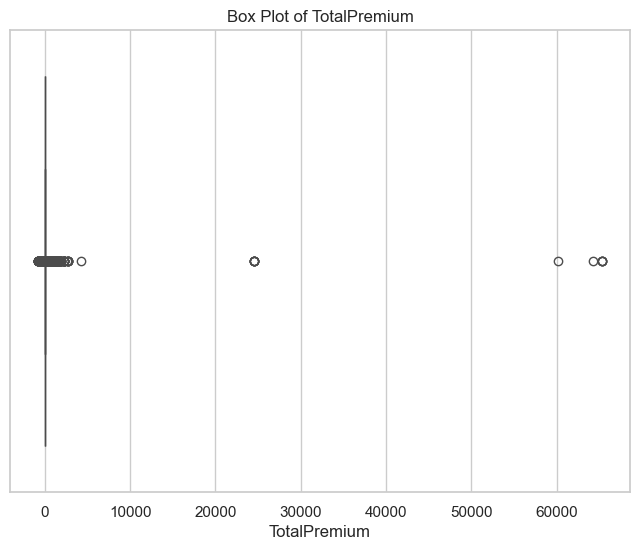

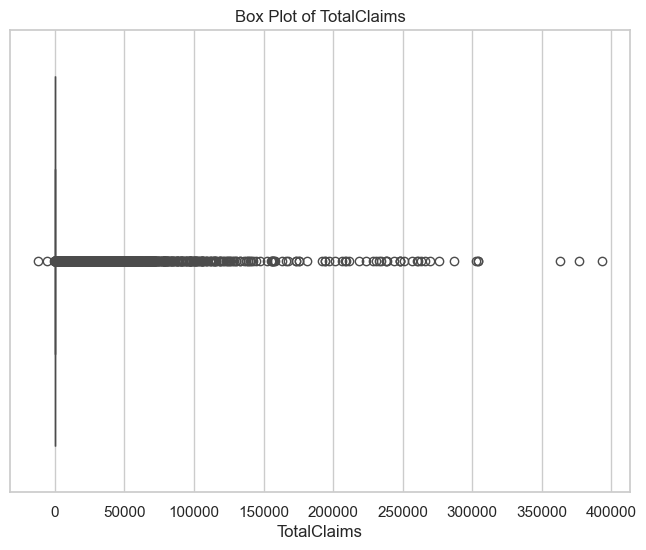

In [74]:
def plot_boxplot(data, column_name):
    """
    Create a box plot for a numerical column.
    Args:
        data (pd.DataFrame): Input data.
        column_name (str): Name of the column.
    """
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')
    plt.xlabel(column_name)
    plt.show()

# Usage
plot_boxplot(data, 'TotalPremium')
plot_boxplot(data, 'TotalClaims')

VISUALIZATION

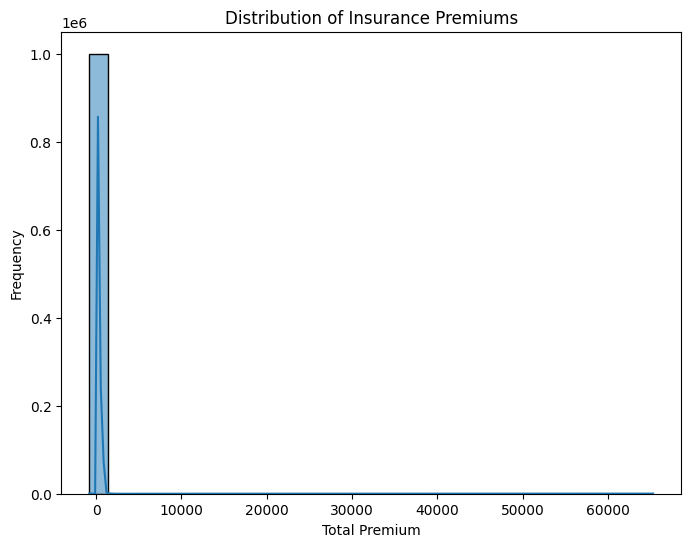

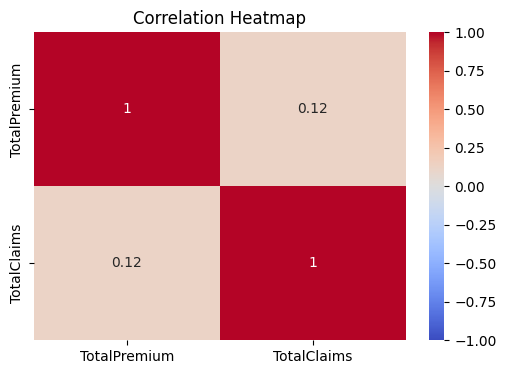

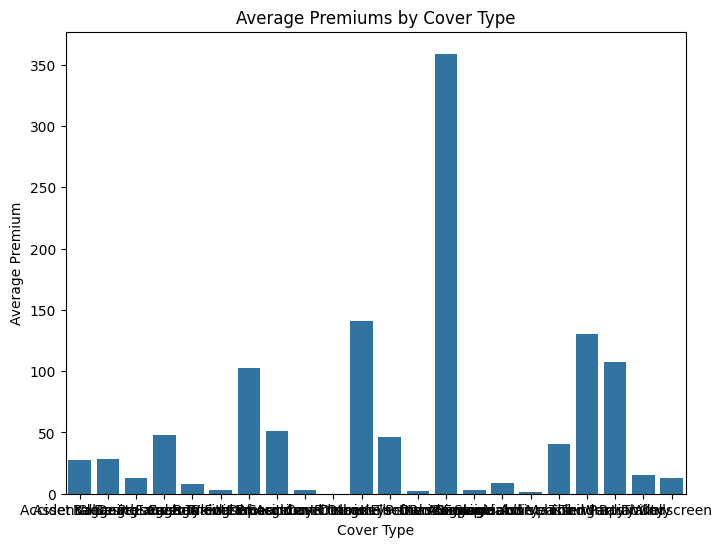

In [4]:
def plot_premium_distribution(data):
    """
    Create a histogram to visualize the distribution of insurance premiums.
    Args:
        data (pd.DataFrame): Input data.
    """
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x='TotalPremium', bins=30, kde=True)
    plt.xlabel('Total Premium')
    plt.ylabel('Frequency')
    plt.title('Distribution of Insurance Premiums')
    plt.show()

def plot_correlation_heatmap(data):
    """
    Create a heatmap to visualize the correlation between TotalPremium and TotalClaims.
    Args:
        data (pd.DataFrame): Input data.
    """
    correlation_matrix = data[['TotalPremium', 'TotalClaims']].corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Heatmap')
    plt.show()

def plot_avg_premium_by_cover(data):
    """
    Create a bar chart to compare average premiums by insurance cover type.
    Args:
        data (pd.DataFrame): Input data.
    """
    avg_premium_by_cover = data.groupby('CoverType')['TotalPremium'].mean()
    plt.figure(figsize=(8, 6))
    sns.barplot(x=avg_premium_by_cover.index, y=avg_premium_by_cover.values)
    plt.xlabel('Cover Type')
    plt.ylabel('Average Premium')
    plt.title('Average Premiums by Cover Type')
    plt.show()

# Usage
plot_premium_distribution(data)
plot_correlation_heatmap(data)
plot_avg_premium_by_cover(data)

In [65]:
data

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims,MonthlyChangePremium,MonthlyChangeClaims
